# Assignment 5

Kevin Martin <br>
Syracuse University <br>
CIS663 Wednesday @ 9:00pm EST

## Question 1

Given the described biometric algorithm which has 99% sensitivity, 99% specificity, and only 0.5% of people have been flagged, the probability that a randomly selected person that tested positive has been flagged is: <br>
<br>
P(Flagged|+): P(+|Flagged) x P(Flagged) / P(+) <br>
<br>
P(+|Flagged) = .99 <br>
P(Flagged) = .005<br>
P(+) = .99 x.005 + (1 - .99) x (1 - .005) = .0149<br>
<br>
P(Flagged|+) = .99 x .005 / 0.149 = .332215 = **33.22%**

### b

To increase the value of P(Flagged|+) to 45%, we would want to focus on specificity because of the low number of people flagged (0.5%). Using goal seek in Excel, we can target specificity and solve for 45%. Once we solve, we can achieve a P(Flagged|+) equal to 44.90% by increasing the specificity to .993897 or **99.39%**. This is only a .39% increase, but it has a significant impact on the overall results.

## Question 2

Given the input has a Guassian distribution, mu = 5.1, sigma = 1.9, and we observe spikes that are two standard deviations above the mean, the outliers can be computed as follows (which yields only a single outlier):

In [14]:
data = [2.10, 4.20, 6.00, 4.50, 4.20, 4.30, 2.50, 6.90, 8.10, 7.00, 9.10, 5.30, 6.20,
4.80, 1.80, 5.80, 3.30, 3.30, 4.00, 6.4]
mu = 5.1
sigma = 1.9
devs = 2
spike = sigma * devs
upper, lower = mu + spike, mu - spike
outliers = []
print('Upper bound: ', upper)
print('Lower bound: ', lower)
for i in data:
    if i < lower or i > upper:
        outliers.append(i)
print('The outliers are: ', outliers)

Upper bound:  8.899999999999999
Lower bound:  1.2999999999999998
The outliers are:  [9.1]


## Question 3

First, to generate a set of random numbers that follow a Gaussian distribution, I can use the numpy package "random" which includes the modifier normal. After generating 100 random samples with the given average and standard deviation, the resulting graph does indeed follow a Gaussian distribution.<br>
<br>
Next, I define a function based on the given login information. The function consists of the time penalties multiplied by their respective chances of happening for each of the four possible scenarios.<br>
<br>
Finally, I looped through each of the samples generated and found the average time per week for each "user". This is **~three and a half minutes**, with a standard deviation of **~one minute and twenty seconds**. I use approximations for the final times because it will fluctuate based on the number of samples and even on each subsequent run. However, this is the general answer the model comes up with.<br>
<br>
I ran 5,000 trials for two reasons. First, the more I increased the number of trials, the more the two output graphs resembled the ideal Gaussian distribution. I wanted a very clean graph to really show that the random numbers were indeed generated correctly. Second, this program is very short and runs incredibly fast. The differnece between generating 5 vs. 5,000 samples is neglible, so there was no downside/cost to running more. At 5,000 I feel as though this is more than reasonable for our given lockout scenario, and indeed demonstrates a classical Gaussian distribution.

Distribution of samples generated:


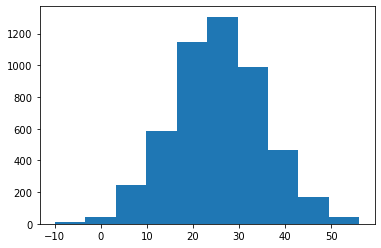

In [33]:
import numpy as np
from matplotlib import pyplot
mu = 25
sigma = 10
samples = 5000

# generate random numbers using a Guassian distribution
logins = np.random.normal(mu, sigma, samples)
print('Distribution of samples generated:')
pyplot.hist(logins)
pyplot.show()

Average lockout time is: 3.45 minutes
Standard deviation lockout time is: 1.34 minutes
Distribution of average lockout times:


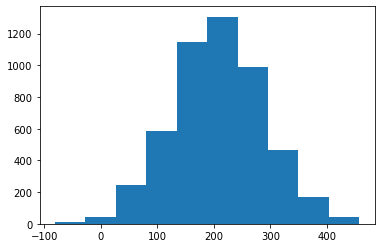

In [34]:
from numpy import std
# inputs
verified = .85
t0 = 0
first = .13
t1 = 5
second = .015
t2 = 60
third = .005
t3 = 60 * 24
attempts = []

def lockout(usr):
    attempts.append(usr*((t0*verified)+(t1*first)+(t2*.005)+(t3*third)))

for k in logins:
    lockout(k)
print('Average lockout time is: %.2f minutes' % (mean(attempts)/60))
print('Standard deviation lockout time is: %.2f minutes' % (std(attempts)/60))
print('Distribution of average lockout times:')
pyplot.hist(attempts)
pyplot.show()